# 几何变换 

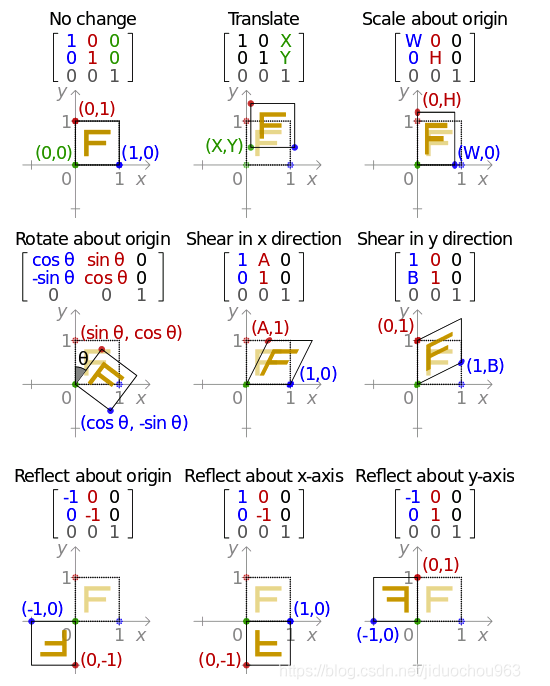

## 扩展缩放
* cv2.resize()：改变图像尺寸
        
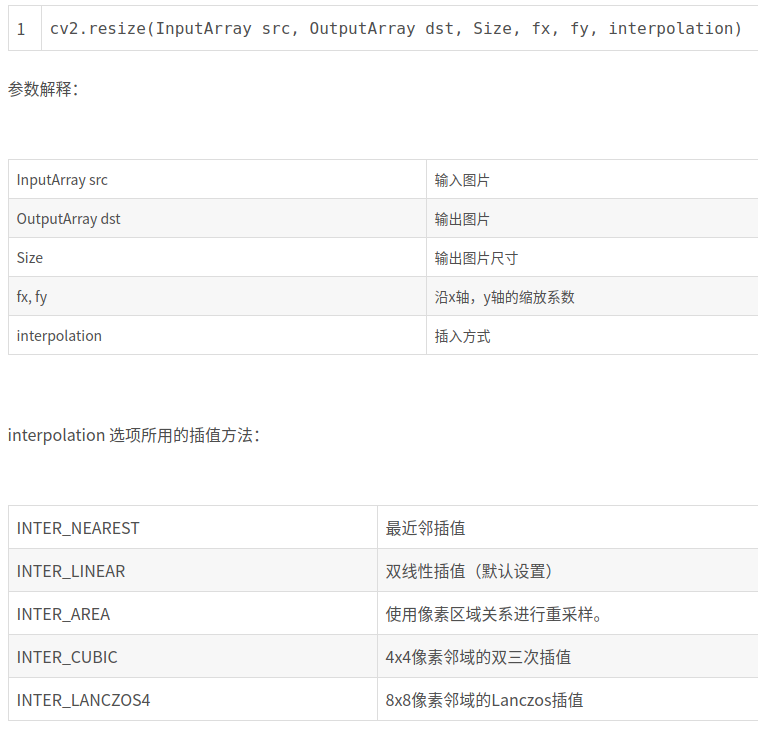
        

cv2.INTER_AREA:缩放

cv2.INTER_CUBIC（慢）和cv2.INTER_LINEAR（默认）

In [9]:
import cv2
import numpy as np

img = cv2.imread('messi0.jpg')

#用缩放因子
# res = cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
# res2 = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)

#用输出尺寸
hight,width = img.shape[:2]
res = cv2.resize(img,(2*width,2*hight),interpolation=cv2.INTER_CUBIC)

# cv2.namedWindow('image',cv2.WINDOW_NORMAL)
while (1):  #常量1，一直循环下去，知道break
    cv2.imshow('img',img)
    cv2.imshow('res',res)
    if cv2.waitKey(0)&0xFF == ord('q'):
        break
cv2.destroyAllWindows()

## 平移 cv2.warpAffine()
cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) 
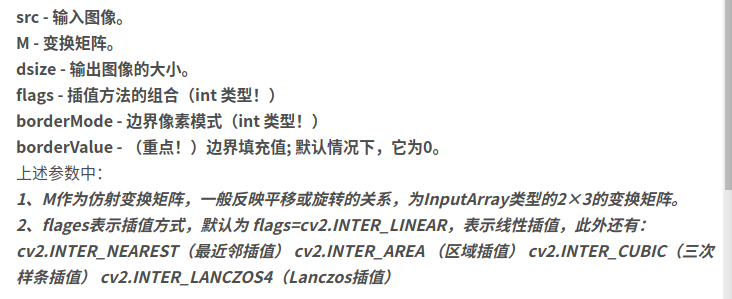
M：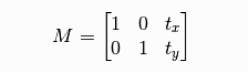

In [12]:
import cv2
import numpy as np

img = cv2.imread('messi0.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
        # 2*3的变换矩阵，向（100，50）平移
dst = cv2.warpAffine(img,M,(cols,rows))
        # 原图，变换矩阵，输出图像大小（不变）
        # 第三个参数（width，height）。记住width =列数，而height =行数。
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 旋转 cv2.getRotationMatrix2D（）


In [1]:
import cv2
import numpy as py
img = cv2.imread('messi0.jpg')
rows,cols = img.shape[:2] #取图片的长宽
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.6)
        # 旋转中心，角度，缩放比例
dst=cv2.warpAffine(img,M,(2*cols,2*rows))
        # 图片，操作矩阵，输出图像尺寸中心
while(1):
    cv2.imshow('img',dst)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()
# print(img.shape)

## 仿射变换cv2.getAffineTransForm()
原图中所有平行线变换后仍平行
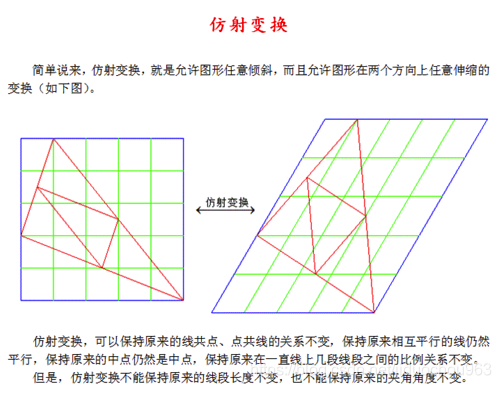
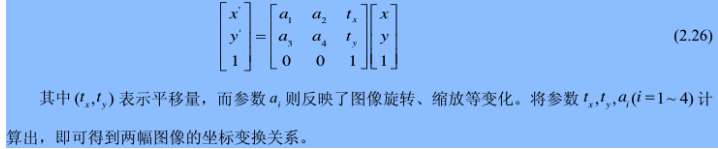

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('bizhi1.jpg',0)
rows,cols,ch = img.shape

pts1 = np.float32([50,50],[200,50],[50,200])
pts2 = np.float32([10,100],[200,50],[100,250])
#行，列，通道数
M = cv2.getAffineTransform(pts1,pts2)
        # 原始图像三点作别、变换后三点坐标
        # 2*3的矩阵
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121,plt.imshow(img),plt.title('Input'))
plt.subplot(121,plt.imshow(img),plt.title('output'))
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

## 透视变换 cv2.getPerspectiveTransform
转换后，直线也将保持直线。要找到此变换矩阵，您需要在输入图像上有4个点，在输出图像上需要相应的点。在这4个点中，其中3个不应共线。



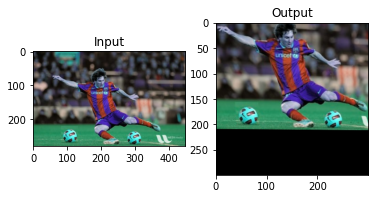

In [6]:
import cv2
import numpy as np
img = cv2.imread('messi0.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
        # 原图四个点、变换后四个点
dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()